# Trabajo Práctico 2 - Organización de Datos
## Competencia de Machine Learning
### Facultad de Ingeniería de la Universidad de Buenos Aires
### 95-58: Organización de Datos - 2do Cuat. 2018

#### Integrantes: Gonzalo Diz,  Ariel Windey, Gabriel Robles y Matías Ramundo



#### Importación de librerías

In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV as GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,\
                             GradientBoostingClassifier, ExtraTreesClassifier,\
                             BaggingClassifier, VotingClassifier)

#### Importación de features

In [2]:
features = pd.read_csv('../features/user_type_events_lagged.csv')
features_all = pd.read_csv('../features/features_todos.csv')
features = pd.merge(features_all, features, how='inner', on='person')
features.shape

(38829, 167)

In [3]:
pd.set_option('display.max_rows', 100)
features.dtypes

person                                    object
marca_favorita_apple                       int64
marca_favorita_asus                        int64
marca_favorita_lenovo                      int64
marca_favorita_lg                          int64
marca_favorita_motorola                    int64
marca_favorita_no_tiene                    int64
marca_favorita_quantum                     int64
marca_favorita_samsung                     int64
marca_favorita_sony                        int64
nivel_de_actividad_muy_bajo                int64
nivel_de_actividad_bajo                    int64
nivel_de_actividad_medio                   int64
nivel_de_actividad_alto                    int64
nivel_de_actividad_muy_alto                int64
dias_en_plataforma                       float64
dias_distintos_con_eventos                 int64
eventos_totales_generados                  int64
cant_accesos_southeast                     int64
cant_accesos_northeast                     int64
cant_accesos_south  

#### Categorización de features categóricos

In [4]:
# Según Marca
features['marca_favorita_apple'] = features['marca_favorita_apple'].astype('category')
features['marca_favorita_asus'] = features['marca_favorita_asus'].astype('category')
features['marca_favorita_lenovo'] = features['marca_favorita_lenovo'].astype('category')
features['marca_favorita_lg'] = features['marca_favorita_lg'].astype('category')
features['marca_favorita_motorola'] = features['marca_favorita_motorola'].astype('category')
features['marca_favorita_no_tiene'] = features['marca_favorita_no_tiene'].astype('category')
features['marca_favorita_quantum'] = features['marca_favorita_quantum'].astype('category')
features['marca_favorita_samsung'] = features['marca_favorita_samsung'].astype('category')
features['marca_favorita_sony'] = features['marca_favorita_sony'].astype('category')

features['cant_modelo_iphone'] = features['cant_modelo_iphone'].astype('category')
features['cant_modelo_samsung'] = features['cant_modelo_samsung'].astype('category')
features['cant_modelo_motorola'] = features['cant_modelo_motorola'].astype('category')
features['cant_modelo_otro'] = features['cant_modelo_otro'].astype('category')
features['modelo_moda'] = features['modelo_moda'].astype('category')

features['porcentaje_modelo_iphone'] = features['porcentaje_modelo_iphone'].astype('category')
features['porcentaje_modelo_samsung'] = features['porcentaje_modelo_samsung'].astype('category')
features['porcentaje_modelo_motorola'] = features['porcentaje_modelo_motorola'].astype('category')
features['porcentaje_modelo_otro'] = features['porcentaje_modelo_otro'].astype('category')

# Nivel de Actividad
features['nivel_de_actividad_muy_bajo'] = features['nivel_de_actividad_muy_bajo'].astype('category')
features['nivel_de_actividad_bajo'] = features['nivel_de_actividad_bajo'].astype('category')
features['nivel_de_actividad_medio'] = features['nivel_de_actividad_medio'].astype('category')
features['nivel_de_actividad_alto'] = features['nivel_de_actividad_alto'].astype('category')
features['nivel_de_actividad_muy_alto'] = features['nivel_de_actividad_muy_alto'].astype('category')
features['has_converted_before'] = features['has_converted_before'].astype('category')
features['month_moda'] = features['month_moda'].astype('category')
features['completa_flujo'] = features['completa_flujo'].astype('category')
# No es Categorico: features['dias_en_plataforma'] = features['dias_en_plataforma'].astype('category')
# No es Categorico: features['dias_distintos_con_eventos'] = features['dias_distintos_con_eventos'].astype('category')
# No es Categorico: features['eventos_totales_generados'] = features['eventos_totales_generados'].astype('category')
# No es Categorico: features['first_and_last_event_distance_in_days'] = features['first_and_last_event_distance_in_days'].astype('category')
# No es Categorico: features['mean_events_per_day'] = features['mean_events_per_day'].astype('category')
# No es Categorico: features['most_viewed_sku'] = features['most_viewed_sku'].astype('category')
# No es Categorico: features['most_viewed_color_Preto'] = features['most_viewed_color_Preto'].astype('category')
# No es Categorico: features['most_viewed_color_Branco'] = features['most_viewed_color_Branco'].astype('category')
# No es Categorico: features['most_viewed_color_Dourado'] = features['most_viewed_color_Dourado'].astype('category')
# No es Categorico: features['most_viewed_sky'] = features['most_viewed_sky'].astype('category')
# No es Categorico: features['cantidad_checkouts'] = features['cantidad_checkouts'].astype('category')
# No es Categorico: features['tasa_cc'] = features['tasa_cc'].astype('category')


# Según Dispositivo
features['favorite_device_computer'] = features['favorite_device_computer'].astype('category')
features['favorite_device_smartphone'] = features['favorite_device_smartphone'].astype('category')
features['favorite_device_tablet'] = features['favorite_device_tablet'].astype('category')
features['favorite_device_unknown'] = features['favorite_device_unknown'].astype('category')


# Accesos Según Región
# No es Categorico: features['cant_accesos_southeast'] = features['cant_accesos_southeast'].astype('category')
# No es Categorico: features['cant_accesos_northeast'] = features['cant_accesos_northeast'].astype('category')
# No es Categorico: features['cant_accesos_south'] = features['cant_accesos_south'].astype('category')
# No es Categorico: features['cant_accesos_center_west'] = features['cant_accesos_center_west'].astype('category')
# No es Categorico: features['cant_accesos_north'] = features['cant_accesos_north'].astype('category')

# Eventos Según Franja Horaria
# No es Categorico: features['cant_ev_madrugada'] = features['cant_ev_madrugada'].astype('category')
# No es Categorico: features['cant_ev_manana'] = features['cant_ev_manana'].astype('category')
# No es Categorico: features['cant_ev_tarde'] = features['cant_ev_tarde'].astype('category')
# No es Categorico: features['cant_ev_noche'] = features['cant_ev_noche'].astype('category')
features['franja_horaria_moda'] = features['franja_horaria_moda'].astype('category')

# Según Estado del Celular
# No es Categorico: features['cant_buenos'] = features['cant_buenos'].astype('category')
# No es Categorico: features['cant_excelentes'] = features['cant_excelentes'].astype('category')
# No es Categorico: features['cant_muy_buenos'] = features['cant_muy_buenos'].astype('category')
# No es Categorico: features['cant_nuevos'] = features['cant_nuevos'].astype('category')
features['condicion_de_producto_moda'] = features['condicion_de_producto_moda'].astype('category')

# Según Semana del Mes
# No es Categorico: features['cant_ev_primer_semana_mes'] = features['cant_ev_primer_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_segunda_semana_mes'] = features['cant_ev_segunda_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_tercera_semana_mes'] = features['cant_ev_tercera_semana_mes'].astype('category')
# No es Categorico: features['cant_ev_cuarta_semana_mes'] = features['cant_ev_cuarta_semana_mes'].astype('category')
features['semana_del_mes_moda'] = features['semana_del_mes_moda'].astype('category')
# No es Categorico: features['porcentaje_eventos_en_fin_de_semana'] = features['porcentaje_eventos_en_fin_de_semana'].astype('category')

# Interes En Los Últimos Días
# No es Categorico: features['interest_last_2_days'] = features['interest_last_2_days'].astype('category')
# No es Categorico: features['interest_last_4_days'] = features['interest_last_4_days'].astype('category')
# No es Categorico: features['interest_last_6_days'] = features['interest_last_6_days'].astype('category')
# No es Categorico: features['interest_last_8_days'] = features['interest_last_8_days'].astype('category')
# No es Categorico: features['interest_last_10_days'] = features['interest_last_10_days'].astype('category')
# No es Categorico: features['interest_last_12_days'] = features['interest_last_12_days'].astype('category')
# No es Categorico: features['interest_last_14_days'] = features['interest_last_14_days'].astype('category')
# No es Categorico: features['interest_last_16_days'] = features['interest_last_16_days'].astype('category')
# No es Categorico: features['interest_last_18_days'] = features['interest_last_18_days'].astype('category')
# No es Categorico: features['interest_last_20_days'] = features['interest_last_20_days'].astype('category')
# No es Categorico: features['interest_last_22_days'] = features['interest_last_22_days'].astype('category')
# No es Categorico: features['interest_last_24_days'] = features['interest_last_24_days'].astype('category')
# No es Categorico: features['interest_last_26_days'] = features['interest_last_26_days'].astype('category')
# No es Categorico: features['interest_last_28_days'] = features['interest_last_28_days'].astype('category')
# No es Categorico: features['interest_last_30_days'] = features['interest_last_30_days'].astype('category')

# Cantidad Total de Eventos

# No es Categorico: features['ad_campaign_hit'] = features['ad_campaign_hit'].astype('category')
# No es Categorico: features['brand_listing'] = features['brand_listing'].astype('category')
# No es Categorico: features['checkout'] = features['checkout'].astype('category')
# No es Categorico: features['conversion'] = features['conversion'].astype('category')
# No es Categorico: features['generic_listing'] = features['generic_listing'].astype('category')
# No es Categorico: features['lead'] = features['lead'].astype('category')
# No es Categorico: features['search_engine_hit'] = features['search_engine_hit'].astype('category')
# No es Categorico: features['searched_products'] = features['searched_products'].astype('category')
# No es Categorico: features['staticpage_ev'] = features['staticpage_ev'].astype('category')
# No es Categorico: features['viewed_product'] = features['viewed_product'].astype('category')
# No es Categorico: features['visited_site'] = features['visited_site'].astype('category')
# No es Categorico: features['cant_total_eventos'] = features['cant_total_eventos'].astype('category')

In [5]:
features.head()

,person,marca_favorita_apple,marca_favorita_asus,marca_favorita_lenovo,marca_favorita_lg,marca_favorita_motorola,marca_favorita_no_tiene,marca_favorita_quantum,marca_favorita_samsung,marca_favorita_sony,...,cant_viewed_product_last_28_days,cant_searched_products_last_28_days,cant_checkout_last_28_days,cant_conversion_last_28_days,cant_visited_site_last_28_days,cant_viewed_product_last_30_days,cant_searched_products_last_30_days,cant_checkout_last_30_days,cant_conversion_last_30_days,cant_visited_site_last_30_days
0,0008ed71,1,0,0,0,0,0,0,0,0,...,0,0,3,0,2,0,0,3,0,2
1,00091926,1,0,0,0,0,0,0,0,0,...,366,0,2,0,33,372,0,2,0,34
2,00091a7a,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000ba417,0,0,0,0,0,0,0,1,0,...,153,0,6,1,6,153,0,6,1,6
4,000c79fe,1,0,0,0,0,0,0,0,0,...,3,9,1,0,1,3,9,1,0,1


In [6]:
features.shape

(38829, 167)

Obtengo el **nombre de las columnas** de los features

In [7]:
for column in features.columns:
    print ("'" + column + "'" + ",")


'person',
'marca_favorita_apple',
'marca_favorita_asus',
'marca_favorita_lenovo',
'marca_favorita_lg',
'marca_favorita_motorola',
'marca_favorita_no_tiene',
'marca_favorita_quantum',
'marca_favorita_samsung',
'marca_favorita_sony',
'nivel_de_actividad_muy_bajo',
'nivel_de_actividad_bajo',
'nivel_de_actividad_medio',
'nivel_de_actividad_alto',
'nivel_de_actividad_muy_alto',
'dias_en_plataforma',
'dias_distintos_con_eventos',
'eventos_totales_generados',
'cant_accesos_southeast',
'cant_accesos_northeast',
'cant_accesos_south',
'cant_accesos_center_west',
'cant_accesos_north',
'cant_total_eventos',
'first_and_last_event_distance_in_days',
'mean_events_per_day',
'cant_ev_madrugada',
'cant_ev_manana',
'cant_ev_tarde',
'cant_ev_noche',
'franja_horaria_moda',
'cant_buenos',
'cant_excelentes',
'cant_muy_buenos',
'cant_nuevos',
'condicion_de_producto_moda',
'cant_ev_primer_semana_mes',
'cant_ev_segunda_semana_mes',
'cant_ev_tercera_semana_mes',
'cant_ev_cuarta_semana_mes',
'semana_del_mes_moda'

In [8]:
features_names = ['cant_total_eventos',
                  'mean_events_per_day',
                  'favorite_device_computer',
                  'checkout',
                  'conversion',
                  'tasa_cc',
                  'most_viewed_sku',
                  'month_moda',
                  'viewed_product',
                  'dias_en_plataforma',
                  'ad_campaign_hit',
                  'brand_listing', 
                  'search_engine_hit',
                  'searched_products',
                  
'cant_viewed_product_last_2_days',
'cant_searched_products_last_2_days',
'cant_checkout_last_2_days',
'cant_conversion_last_2_days',
'cant_visited_site_last_2_days',
'cant_viewed_product_last_4_days',
'cant_searched_products_last_4_days',
'cant_checkout_last_4_days',
'cant_conversion_last_4_days',
'cant_visited_site_last_4_days',
'cant_viewed_product_last_6_days',
'cant_searched_products_last_6_days',
'cant_checkout_last_6_days',
'cant_conversion_last_6_days',
'cant_visited_site_last_6_days',
'cant_viewed_product_last_8_days',
'cant_searched_products_last_8_days',
'cant_checkout_last_8_days',
'cant_conversion_last_8_days',
'cant_visited_site_last_8_days',
'cant_viewed_product_last_10_days',
'cant_searched_products_last_10_days',
'cant_checkout_last_10_days',
'cant_conversion_last_10_days',
'cant_visited_site_last_10_days',
'cant_viewed_product_last_12_days',
'cant_searched_products_last_12_days',
'cant_checkout_last_12_days',
'cant_conversion_last_12_days',
'cant_visited_site_last_12_days',
'cant_viewed_product_last_14_days',
'cant_searched_products_last_14_days',
'cant_checkout_last_14_days',
'cant_conversion_last_14_days',
'cant_visited_site_last_14_days',
'cant_viewed_product_last_16_days',
'cant_searched_products_last_16_days',
'cant_checkout_last_16_days',
'cant_conversion_last_16_days',
'cant_visited_site_last_16_days',
'cant_viewed_product_last_18_days',
'cant_searched_products_last_18_days',
'cant_checkout_last_18_days',
'cant_conversion_last_18_days',
'cant_visited_site_last_18_days',
'cant_viewed_product_last_20_days',
'cant_searched_products_last_20_days',
'cant_checkout_last_20_days',
'cant_conversion_last_20_days',
'cant_visited_site_last_20_days',
'cant_viewed_product_last_22_days',
'cant_searched_products_last_22_days',
'cant_checkout_last_22_days',
'cant_conversion_last_22_days',
'cant_visited_site_last_22_days',
'cant_viewed_product_last_24_days',
'cant_searched_products_last_24_days',
'cant_checkout_last_24_days',
'cant_conversion_last_24_days',
'cant_visited_site_last_24_days',
'cant_viewed_product_last_26_days',
'cant_searched_products_last_26_days',
'cant_checkout_last_26_days',
'cant_conversion_last_26_days',
'cant_visited_site_last_26_days',
'cant_viewed_product_last_28_days',
'cant_searched_products_last_28_days',
'cant_checkout_last_28_days',
'cant_conversion_last_28_days',
'cant_visited_site_last_28_days',
'cant_viewed_product_last_30_days',
'cant_searched_products_last_30_days',
'cant_checkout_last_30_days',
'cant_conversion_last_30_days',
'cant_visited_site_last_30_days'
]

### Creación del Training Set

In [9]:
labels_training_set = pd.read_csv('../dataset/labels_training_set.csv')
test_set = pd.read_csv('../dataset/trocafone_kaggle_test.csv')
test_set.shape

(19415, 1)

En **labels_training_set** están los usuarios con los labels, los resultados que conocemos de compras (1) o no (0) en los primeros 15 días de Junio.

En **test_set** están solamente las personas que queremos predecir si compraron o no.

Realizamos un merge entre el modelo con los **features** y **labels_training_set** para generar un modelo completo con los labels, con el fin de entrenar los algoritmos. Este modelo se guarda en **training_set**.

In [10]:
training_set_global = pd.merge(features, labels_training_set, how='inner', on='person')
training_set_global.head()

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


,person,marca_favorita_apple,marca_favorita_asus,marca_favorita_lenovo,marca_favorita_lg,marca_favorita_motorola,marca_favorita_no_tiene,marca_favorita_quantum,marca_favorita_samsung,marca_favorita_sony,...,cant_searched_products_last_28_days,cant_checkout_last_28_days,cant_conversion_last_28_days,cant_visited_site_last_28_days,cant_viewed_product_last_30_days,cant_searched_products_last_30_days,cant_checkout_last_30_days,cant_conversion_last_30_days,cant_visited_site_last_30_days,label
0,0008ed71,1,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,3,0,2,0
1,000c79fe,1,0,0,0,0,0,0,0,0,...,9,1,0,1,3,9,1,0,1,0
2,001802e4,1,0,0,0,0,0,0,0,0,...,4,1,0,1,4,4,1,0,1,0
3,0019e639,0,0,0,0,1,0,0,0,0,...,1,4,1,9,123,1,4,1,12,0
4,001b0bf9,0,0,0,0,0,0,0,1,0,...,0,2,1,0,2,0,2,1,0,0


In [11]:
training_set_global.shape

(19414, 168)

Merge de **test_set**, que son las personas que queremos predecir si compraron o no con el resto del modelo con features.

In [12]:
test_set = pd.merge(features, test_set, how='inner', on='person')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


Teniendo el **training_set_global** completo, lo dividimos en dos partes:
1. Un training set propiamente dicho.
2. Un test set.

Esto se hace con la función train_test_split, que recibe:

1. x - Arreglo con todas las columnas del training_set original menos la última (que es el label)

2. y - Arreglo con la última columna del training_set original (que es el label)

3. % del tamaño del test set sobre el total del tamaño del training_set original

De yapa:

z - arreglo con todas las columnas del test_set original. Este data frame tiene las predicciones que tenemos que hacer y comparar en Kaggle para obtener el resultado.

In [13]:
x = np.array(training_set_global[features_names])
y = np.array(training_set_global['label'])
z = np.array(test_set[features_names])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
z.shape

(19415, 89)

### XGBoost + RandomSearch

Defino una función **model_fit()** que recibe el algoritmo clasificador y realiza estas tareas:

1. Fitting: Entrena el algoritmo con el training set X (person + features) e Y (labels)
2. Predicción: Predice los labels en el set de testing
3. Cálculo de accuracy: Calcula el accuracy de la predicción anterior comparando con los labels conocidos (y_test)

La predicción del punto 2 retorna una probabilidad [0, 1] por eso:

4. Clasificación: etiqueta con 0 o 1 dependiendo de la probabilidad.


In [14]:
def modelfit(alg):
    alg.fit(X_train, y_train, eval_metric='aucpr')
    pred = (alg.predict_proba(X_test)[:,1])
    accuracy = accuracy_score(y_test, pred.round(), normalize=False)
    pred_proba = pred
    print("Accuracy: ", accuracy / float(pred.size))

    for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
        else: 
            pred[i] = 0

    print('---Classification Report---')
    print(classification_report(y_test,pred))
    print('AUROC :' + str(roc_auc_score(y_test, pred_proba)))

Defino función Timer que servirá para tomar los tiempos de ejecución de los algoritmos

In [15]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

#### Random Search

Buscaremos los mejores hiperparámetros para XGBoost utilizando la técnica de Random Search, a modo de tener una primera aproximación.

In [220]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 3, 5, 7, 8, 9, 10, 11, 12, 13],
        'gamma': [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
        'subsample': [0.5, 0.55, 0.58, 0.6, 0.62, 0.63, 0.65, 0.7, 1],
        'colsample_bytree': [0.7, 0.75, 0.78, 0.8, 0.83, 0.85, 0.9, 1.0],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 9, 10],
        'n_estimators': [650, 675, 700, 725, 750],
        'learning_rate': [0.01, 0.02, 0.03, 0.05],
        'scale_pos_weight' : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
        }

param_test = {
    'n_estimators': [500, 800, 1000, 1500],
    'max_depth':range(1,4),
    'min_child_weight':range(4,7),
    'gamma':[i/10.0 for i in range(1,8)],
    'subsample':[i/10.0 for i in range(3,8)],
    'colsample_bytree':[i/10.0 for i in range(5,8)],
    'learning_rate':[0.001, 0.01, 0.1, 0.2],
    'scale_pos_weight' : [10, 15, 18]
}


# Best hyperparameters:
#{'subsample': 0.7, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 1.0}

# Best hyperparameters:
#{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 8, 'colsample_bytree': 0.8}


In [221]:
xgb1 = xgb.XGBClassifier(objective='binary:logistic')

In [222]:
folds = 6
param_comb = 600

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb1, param_distributions=param_test, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 6 folds for each of 600 candidates, totalling 3600 fits
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1,

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   41.4s


[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.7, score=0.845072654233, total=  17.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.7, score=0.827702125412, total=  17.6s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.5, score=0.839087580442, total=  21.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytre

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3, score=0.861655590663, total=  16.3s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.2, score=0.844052814557, total=  20.1s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.2, score=0.833520705098, total=  20.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.5 
[CV]  colsample

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6, score=0.82959784994, total=  29.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6, score=0.830607643526, total=  29.5s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.2, score=0.862784167961, total=  52.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.6, score=0.870556782771, total=  52.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.6, score=0.883047967017, total=  53.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.7, score=0.84570334952, total=  18.8s
[CV] colsa

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.3min


[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3, score=0.850759785874, total=   9.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3, score=0.811243463915, total=  10.0s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6, score=0.825292181374, total=  24.1s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7, score=0.854681374362, total=   7.5s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7, score=0.843891887527, total=   7.5s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7, score=0.839514457835, total=   7.5s
[CV] colsample_bytree=0.5

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.1, score=0.832287870456, total=  30.2s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.1, score=0.835907377892, total=  15.3s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.1, score=0.84923275763, total=  15.0s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.2, score=0.866590858957, total=   8.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.2, score=0.884063914598, total=   9.0s
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.2, score=0.877663755526, total=   8.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.4 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.2, score=0.831765915735, total=  13.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.2, score=0.821668577394, total=  12.6s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.2, score=0.83955913899, total=  21.3s
[CV] colsample_bytree=0.

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.1, score=0.84089701647, total=  11.7s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3, score=0.811806284511, total=  27.6s
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3, score=0.809363981557, total=  28.2s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.5 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.5 
[CV]  colsample_byt

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.7, score=0.855370219691, total=  13.8s
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.7, score=0.849138814527, total=  13.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.7, score=0.882280569303, total=  13.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7 
[CV]  colsample_

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.5min


[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1, score=0.833934513324, total=  13.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1, score=0.859623695502, total=  13.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7, score=0.820101955273, total=  36.2s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.2 
[CV]  colsample_bytr

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.4, score=0.866969897504, total=  30.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.4, score=0.884533052472, total=  30.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.4, score=0.870511733107, total=  30.7s
[CV] colsamp

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.2, score=0.849023906981, total=   6.3s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.2, score=0.879459528314, total=   6.3s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.2, score=0.862017541407, total=   6.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.1 
[CV] colsample_bytr

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.7, score=0.862475805224, total=   7.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.7, score=0.876722372906, total=   7.1s
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.7, score=0.878668829051, total=   7.2s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_byt

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.6, score=0.840947769862, total=  10.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.6, score=0.869157136333, total=  10.6s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.6, score=0.868563723526, total=  10.6s
[CV] colsample_bytree=

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7, score=0.807995227843, total=  31.7s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.812139796873, total=  26.6s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.805466232947, total=  27.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytre

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.4 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.5, score=0.843488148832, total=  10.8s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.4, score=0.858911531918, total=  20.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, le

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.1, score=0.859404660931, total=  44.1s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.1, score=0.883116318231, total=  45.0s
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.1, score=0.851025472208, total=  46.0s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.1 
[CV] colsa

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4, score=0.760476773148, total=   5.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7, score=0.836603422344, total=  27.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.7, score=0.832592127901, total=  28.2s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.4 
[CV]  colsample

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 21.7min


[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.5, score=0.818928315112, total=  19.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.5, score=0.82877088984, total=  18.5s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.5, score=0.830557342008, total=  18.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5, score=0.861745506324, total=  23.9s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5, score=0.854424561643, total=  24.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=1

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.84375679352, total=  14.2s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.865094899446, total=  14.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.87402094654, total=  14.2s
[CV] colsample_

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2, score=0.845892868794, total=  10.9s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.1, score=0.860162857213, total=  26.6s
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2, score=0.871041455011, total=  10.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.1, score=0.850164583179, total=   8.5s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.1, score=0.832475667551, total=   8.6s
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.1, score=0.839017358101, total=  31.3s
[CV] colsample_bytree

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.7, score=0.788925239307, total=  16.1s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.1, score=0.823640185418, total=  20.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.1, score=0.826241156777, total=  20.1s
[CV]  colsample_bytr

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.4, score=0.758943911616, total=   5.7s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.4, score=0.807015009305, total=   5.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.4, score=0.77646667723, total=   5.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.2 
[CV]  colsampl

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.83590687181, total=  16.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.830946154945, total=  16.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.7, score=0.795937452426, total=  15.9s
[CV] colsample_bytre

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3, score=0.836924452947, total=  16.4s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3, score=0.841816650977, total=  16.9s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.3, score=0.868107013145, total=  16.2s
[CV] colsample_byt

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5, score=0.867341168868, total=  11.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5, score=0.855670199182, total=  11.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2, score=0.855639901867, total=   7.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.4, score=0.861780950268, total=  20.8s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.4, score=0.849640370437, total=  20.4s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.4, score=0.882502710747, total=  20.2s
[CV]  colsamp

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.4, score=0.859252424138, total=   9.6s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1, score=0.844767857583, total=  14.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1, score=0.840862365605, total=  14.5s
[CV] colsample_bytree=0.

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 33.0min


[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1, score=0.845799662594, total=  14.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.1, score=0.825962276344, total=  14.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.4, score=0.85836138028, total=  17.2s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytr

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1, score=0.857808146559, total=  18.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1, score=0.844598413655, total=  18.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1, score=0.877464915633, total=  18.7s
[CV] colsa

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.4, score=0.803446765279, total=  26.4s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7, score=0.856151764549, total=  20.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7, score=0.865341895876, total=  21.0s
[CV] colsample_

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.4, score=0.854533257971, total=  37.5s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.4, score=0.869800259113, total=  38.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.1, score=0.855351727199, total=  10.8s
[CV] colsampl

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.3, score=0.86993696154, total=  26.9s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.7, score=0.850369873271, total=  10.9s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.7, score=0.840132725629, total=  10.9s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.4 
[CV]  colsample_bytre

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.4 
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.6, score=0.858444637071, total=  12.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3, score=0.863107786572, total=  15.8s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learni

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.860546576423, total=  26.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.845090652737, total=  27.3s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.3, score=0.836911630545, total=  20.2s
[CV] colsample_bytr

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6, score=0.839019774638, total=   8.7s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6, score=0.828806390102, total=   8.9s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.1, score=0.806536065441, total=  15.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.1, score=0.868661590036, total=  12.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.1, score=0.869245682223, total=  12.5s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.1, score=0.859984092809, total=  12.4s
[CV] colsample_

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.1, score=0.857758018063, total=   9.3s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.1, score=0.84584781913, total=   9.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.1, score=0.830890253977, total=  32.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.2, score=0.804888354507, total=  30.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.2, score=0.801918183598, total=  30.7s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.4, score=0.80920380157, total=  17.1s
[CV] colsample_bytree=0.

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4, score=0.850781681874, total=  24.6s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6, score=0.824771309515, total=  48.0s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6, score=0.831567276815, total=  48.0s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4 
[CV]  colsample

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.6, score=0.886238725933, total=   9.2s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.3, score=0.862480582883, total=  46.2s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.3, score=0.850803421139, total=  46.3s
[CV] colsample_b

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.7, score=0.877940267253, total=  12.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.7, score=0.859084652978, total=  12.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2, score=0.843843232981, total=  12.5s
[CV] colsample_bytree

[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 48.9min


[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.2, score=0.826251215564, total=  14.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.2, score=0.850453758851, total=  14.1s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.2, score=0.855434076808, total=  14.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7 
[CV]  colsample_bytree

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.4, score=0.817865764431, total=  21.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.4, score=0.814311501334, total=  20.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4, score=0.816739403802, total=  27.7s
[CV] colsample_bytree=0

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.811043070585, total=  24.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.811164238645, total=  25.1s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.810984039992, total=  24.4s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.4, score=0.82551644002, total=   8.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.6, score=0.85748461321, total=  29.5s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.6, score=0.880854514442, total=  29.8s
[CV] colsample_bytree

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.3, score=0.859848943818, total=  17.6s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.3, score=0.882120565327, total=  17.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.3, score=0.875510692305, total=  17.6s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  cols

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.3, score=0.810266352251, total=  22.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.1, score=0.868784311532, total=  30.7s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.1, score=0.85814637723, total=  30.7s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.7 
[CV]  colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.5 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.5, score=0.828662149273, total=  11.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.2, score=0.824458549649, total=  33.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.2, score=0.862446679981, total=  18.3s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.2, score=0.853120205716, total=  18.1s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.2, score=0.863167084541, total=  18.0s
[CV] colsample_bytr

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.7, score=0.843533189647, total=  14.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.7, score=0.833061481916, total=  15.0s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.7, score=0.853604128413, total=  14.8s
[CV] colsample_bytree=

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.6, score=0.863819527942, total=  17.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.6, score=0.882953207381, total=  17.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.7, score=0.840483763592, total=  12.2s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_byt

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.1, score=0.877180636723, total=  21.4s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.1, score=0.865276651536, total=  21.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.1, score=0.868375757689, total=  21.4s
[CV] colsample

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.5, score=0.82871962643, total=  16.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6, score=0.861241585916, total=  18.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.6, score=0.85530344909, total=  18.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7 
[CV]  colsampl

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.3, score=0.794374695138, total=  39.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.3, score=0.789164468554, total=  40.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.4, score=0.84181975785, total=  11.7s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.4, score=0.8678631

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.7, score=0.761072119851, total=   6.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.7, score=0.809867119027, total=   6.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.7, score=0.771449076793, total=   6.1s
[CV] colsample_bytr

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.5, score=0.790702370855, total=  26.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.5, score=0.845051409128, total=  17.5s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, lea

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=1, gamma=0.4, score=0.743558674856, total=   6.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3, score=0.85061148507, total=   9.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_ra

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.6, score=0.841331336144, total=  14.7s
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.6, score=0.833877850173, total=  14.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.5 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.6, score=0.819642895979, total=  14.8s
[CV] colsample_b

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 64.0min


[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.5, score=0.862982225578, total=   9.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.5, score=0.831394644372, total=   9.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, lea

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6, score=0.857618208763, total=  53.2s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.4, score=0.795191802825, total=  23.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.4, score=0.805811095887, total=  23.0s
[CV] colsample_bytree=0

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.1, score=0.824166503556, total=  12.5s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.1, score=0.841599169843, total=  12.9s
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.1, score=0.841962674024, total=  12.9s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.5 
[CV]  colsample_b

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.858270652164, total=  30.6s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.880233139775, total=  30.7s
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.853399710557, total=  31.2s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_byt

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.4, score=0.859566218345, total=   6.8s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4, score=0.833160736741, total=  21.1s
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.4, score=0.834530028137, total=  21.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3 
[CV] colsample_bytree=

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.7, score=0.828818083192, total=  25.2s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.7, score=0.833477226567, total=  24.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.7, score=0.799510356762, total=  25.5s
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.7, score=0.82755299

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.2, score=0.808978553253, total=   7.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.2, score=0.771449076793, total=   7.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.2, score=0.743558674856, total=   7.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_byt

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.3, score=0.854464732327, total=   6.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.1, score=0.860762364579, total=  21.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_r

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.5, score=0.880560914912, total=  19.5s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.5, score=0.862435415871, total=  19.5s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.4, score=0.835987005942, total=  23.3s
[CV] colsample_b

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.4, score=0.845864906934, total=  10.6s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.3, score=0.859892440045, total=  33.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.3, score=0.879866528721, total=  33.3s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.3, score=0.872388

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5, score=0.850730145228, total=  13.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5, score=0.838725706371, total=  13.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.4, score=0.85972828365, total=  30.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.5 
[CV]  colsample_by

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.3, score=0.837480357021, total=  18.6s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.3, score=0.854933870201, total=  18.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.3, score=0.864927128286, total=  18.6s
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.3, score=0.86

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3, score=0.760476773148, total=   5.4s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3, score=0.758943911616, total=   5.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3, score=0.807888040712, total=   5.4s
[CV] colsample_

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.1, score=0.773533237172, total=   6.4s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3, score=0.879892937145, total=   8.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.3, score=0.857034116576, total=   8.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.3 
[CV]  colsample_by

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.7, score=0.827577850479, total=  19.2s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.4, score=0.856946704638, total=  10.2s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=2, gamma=0.4, score=0.843412070882, total=  10.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsam

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5, score=0.85578321868, total=  10.2s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5, score=0.84337790918, total=  10.1s
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5, score=0.864478185089, total=  10.0s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytre

[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.3, score=0.876958495279, total=  26.8s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.6, score=0.850195888364, total=  32.1s
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.6, score=0.86984375534, total=  32.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_by

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.2, score=0.838857694768, total=   5.5s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.2, score=0.842026364927, total=   5.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_r

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.860611300145, total=  35.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.3, score=0.844826675942, total=  35.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, l

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.4, score=0.856701681129, total=  13.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 


[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 83.8min


[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4, score=0.852152526074, total=   9.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4, score=0.841887216691, total=   9.6s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4, score=0.84498566178, total=   9.9s
[CV] colsample_bytree=0.6,

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.4, score=0.844398101852, total=  18.3s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.860611300145, total=  38.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.6, score=0.844826675942, total=  38.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.4 
[CV]  colsa

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.3, score=0.874662515884, total=   7.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.1, score=0.823362798037, total=  39.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.3, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.3, score=0.865042082599, total=   7.6s
[CV] colsample_bytree=0.

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.1, score=0.857034116576, total=   9.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.1, score=0.879892937145, total=  10.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.7, score=0.853669898571, total=  17.6s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.7, score=0.86358396

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7, score=0.853602645659, total=  10.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7, score=0.837944645619, total=  10.0s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learnin

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.7, score=0.855210280809, total=  16.0s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.7, score=0.843926449195, total=   9.3s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.7, score=0.832689954596, total=   9.2s
[CV] colsample_bytree=0.

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.1, score=0.864905380173, total=  18.6s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.1, score=0.87777404953, total=  18.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.1, score=0.868054196298, total=  18.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.4 
[CV]  colsa

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.85716771213, total=  28.8s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.878443580734, total=  28.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.87373666763, total=  27.9s
[CV] colsample_bytr

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5, score=0.832374862909, total=  11.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.2, score=0.860849357033, total=  16.1s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.2, score=0.88191861856, total=  15.6s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.6 
[CV]  colsample_bytree

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.5, score=0.8314958478, total=  10.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.4, score=0.872698971936, total=  56.9s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.4, score=0.851143484731, total=  57.5s
[CV] colsample_bytree=0

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6, score=0.850337251101, total=   5.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6, score=0.872259349359, total=   5.7s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.4, score=0.834717188155, total=  30.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytre

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.848064573255, total=  19.2s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.848017970155, total=  18.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.840263214309, total=  17.6s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytre

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.3, score=0.821354783187, total=  13.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.849360865595, total=  22.2s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.865714720677, total=  22.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.3 
[CV] colsample_byt

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.6, score=0.878816405534, total=  23.9s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.6, score=0.861700640327, total=  23.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.6, score=0.824150969189, total=  16.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.4 
[CV]  colsampl

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.804086781186, total=  15.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.838768808234, total=  15.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=2, gamma=0.7 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.2, score=0.820842149086, total=  15.4s
[CV] colsample_bytree=

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.1, score=0.853850023913, total=  16.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.3, score=0.823897974522, total=   9.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learni

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.880711598269, total=  41.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.876181776945, total=  40.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.859923508778, total=  41.0s
[CV] colsample_bytr

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.860383326032, total=  20.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.884683735829, total=  19.9s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.876722372906, total=  19.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsamp

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.3, score=0.815162784628, total=  13.3s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.5, max_depth=3, gamma=0.3, score=0.843034545325, total=  13.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, l

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3, score=0.882364454884, total=  19.2s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3, score=0.868052642862, total=  18.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.3, score=0.856737410173, total=  18.9s
[CV] colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.811614735279, total=  18.0s
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.802194695324, total=  18.3s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.2, score=0.835021918991, total=  17.4s
[CV] colsample_bytree

[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.867342722305, total=  29.1s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=3, gamma=0.1, score=0.884300036972, total=  29.2s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.6, score=0.863951570058, total=  13.6s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.5 
[CV]  colsample

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 106.5min


[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.1, score=0.818549276565, total=  16.2s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.1, score=0.842750266414, total=  16.4s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.5, score=0.812708354693, total=  39.8s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.1 
[CV]  colsample_byt

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.7, max_depth=2, gamma=0.5, score=0.859019408638, total=  24.6s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.2, score=0.881780362696, total=  19.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=1, gamma=0.2, score=0.861121208449, total=  19.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.4 
[CV]  colsam

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.1, score=0.852662745793, total=  46.2s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.1, score=0.871996818562, total=  46.8s
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.1, score=0.869169563826, total=  46.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.3 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.3 
[CV]  colsamp

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2, score=0.828764464376, total=  11.2s
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2, score=0.824868395098, total=  11.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, l

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=3, gamma=0.6, score=0.790857714522, total=  25.7s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.6, score=0.828649721779, total=  15.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.3, max_depth=3, gamma=0.6, score=0.843550286298, total=  14.7s
[CV] colsample_bytree=0.

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.1, score=0.852417302799, total=  45.2s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3, score=0.826394131738, total=  18.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3, score=0.81750226025, total=  17.6s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.7 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.5, score=0.865180338463, total=  11.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.5, score=0.864882078623, total=  12.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=1, gamma=0.5, score=0.855328443115, total=  11.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.3 
[CV]  colsample_byt

[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7, score=0.842930936706, total=  16.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7, score=0.83283747104, total=  16.5s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.3, score=0.875681570338, total=  21.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.5 
[CV]  colsample_byt

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.1, score=0.813547210494, total=  37.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.1, score=0.806845684708, total=  37.1s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.5, score=0.796655140167, total=  32.4s
[CV] colsample_bytr

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.3, score=0.870850382301, total=  37.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.1, score=0.87787657635, total=  15.3s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.3, score=0.859252424138, total=  37.0s
[CV] colsample

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6, score=0.843161927131, total=  10.6s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.1, score=0.861029555686, total=  33.8s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learnin

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.6, score=0.872771983459, total=  10.8s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.6, score=0.859528935865, total=  11.1s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.2, score=0.840240279113, total=  20.4s
[CV]  colsample_byt

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.4, max_depth=3, gamma=0.2, score=0.88169492368, total=  12.2s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.876100998238, total=  29.8s
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.857295093936, total=  30.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.4, max_depth=2, gamma=0.2 
[CV] colsample

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.3, score=0.875150294998, total=  17.2s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=3, gamma=0.3, score=0.862045503267, total=  17.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=2, gamma=0.6, score=0.800218723883, total=  14.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.2, score=0.830257415489, total=  39.2s
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.2, score=0.83197411164, total=  39.1s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.5, score=0.864628868446, total=  10.0s
[CV] colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.6, score=0.843414823582, total=  10.6s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.7, max_depth=1, gamma=0.6, score=0.832256722091, total=  10.6s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.6, score=0.872389838039, total=  13.9s
[CV] colsample_byt

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.5, score=0.761531937104, total=   6.9s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.5, score=0.808978553253, total=   7.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=1000, subsample=0.7, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.6, max_depth=1, gamma=0.5, score=0.771449076793, total=   6.9s
[CV] colsam

[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.4, score=0.88165298089, total=  26.5s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.4, score=0.876197311312, total=  26.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=1, gamma=0.4, score=0.862140262904, total=  11.1s
[CV] colsample_byt

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6 
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6, score=0.86947093054, total=  36.9s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6, score=0.823722507593, total=  10.7s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.6, score=0.838409522401, total=  11.1s
[CV] colsample_bytr

[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.817188305517, total=  23.4s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.4 
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.4, score=0.844373256977, total=   8.2s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=500, subsample=0.3, max_depth=2, gamma=0.4 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.3, score=0.799501036142, total=  23.5s
[CV] colsample_

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6, score=0.814476165621, total=  30.4s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6, score=0.820491072399, total=  30.4s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6, score=0.791836379623, total=  30.3s
[CV] colsample_byt

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.5, score=0.859194946981, total=   9.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.5, score=0.849583834317, total=   9.7s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.7, score=0.816731780943, total=  52.0s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.3 
[CV]  colsample_bytree=0

[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.3, score=0.874042694653, total=   7.0s
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.5, max_depth=1, gamma=0.3, score=0.85816967878, total=   6.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.7, max_depth=3, gamma=0.7, score=0.808265525823, total=  37.9s
[CV] colsample_bytr

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6, score=0.793871381658, total=  51.9s
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=3, gamma=0.6, score=0.815228666017, total=  52.1s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5, score=0.832427201223, total=  18.5s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_byt

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.7, score=0.858773965644, total=  42.4s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 


[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 135.1min


[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.6, score=0.868768777166, total=  17.7s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.3, max_depth=2, gamma=0.6, score=0.848101855735, total=  17.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=1, gamma=0.3, score=0.844490470202, total=  19.3s
[CV] cols

[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.6, score=0.852298772042, total=  14.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.6, score=0.863637775852, total=  15.0s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=800, subsample=0.3, max_depth=3, gamma=0.3 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.01, min_child_weight=4, n_estimators=800, subsample=0.6, max_depth=2, gamma=0.6, score=0.885462007599, total=  15.0s
[CV] colsample_bytr

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6, score=0.860779273615, total=  48.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6, score=0.852157466817, total=  48.5s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.01, min_child_weight=4, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.6, score=0.851566019505, total=  48.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsamp

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.2, score=0.834142673837, total=  29.8s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.2, score=0.840114084389, total=  29.5s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=2, gamma=0.2, score=0.832228839862, total=  29.9s
[CV] colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.01, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_

[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.5, max_depth=3, gamma=0.6, score=0.830793464381, total=  52.1s
[CV] colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2, score=0.806109302956, total=  22.5s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.2, score=0.829846769235, total=  22.9s
[CV] colsample_bytree=

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.1, min_child_weight=4, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.4 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.1, score=0.867095725874, total=  32.3s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.1, score=0.884365281312, total=  32.3s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.1, score=0.871269810201, total=  32.1s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=1, gamma=0.7 
[CV] colsampl

[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.6, score=0.855987100262, total=  18.5s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.7, score=0.859111867249, total=  24.0s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=2, gamma=0.7, score=0.844474189281, total=  25.0s
[CV] colsample_

[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.812161544986, total=  36.3s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.834503071144, total=  36.1s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.1, min_child_weight=4, n_estimators=1500, subsample=0.5, max_depth=2, gamma=0.6, score=0.836820798653, total=  36.3s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.7 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.7, score=0.845540966093, total=  26.7s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.6 
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.6, scale_pos_weight=18, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.7, score=0.878014832213, total=  26.4s
[CV] colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.6, max_depth=3, gamma=0.6, score=0.827181497645, total=  21.5s
[CV] colsample_bytr

[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7, score=0.819514406922, total=  20.6s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3, score=0.799233845035, total=  36.3s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=18, learning_rate=0.2, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.3, score=0.81253747666, total=  35.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=800, subsample=0.4, max_depth=3, gamma=0.6 
[CV]  colsample_by

[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=2, gamma=0.5, score=0.878665722177, total=  30.0s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.6, score=0.838476762141, total=  10.8s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.01, min_child_weight=5, n_estimators=1500, subsample=0.5, max_depth=1, gamma=0.1 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=500, subsample=0.6, max_depth=2, gamma=0.6, score=0.864664597489, total=  11.1s
[CV] colsample_b

[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.5, score=0.871776230555, total=  48.9s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.4, max_depth=3, gamma=0.5, score=0.860103707432, total=  48.3s
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.5 
[CV] colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=4, n_estimators=500, subsample=0.7, max_depth=2, gamma=0.5, score=0.856339534482, total=  10.4s
[CV] colsam

[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.5, score=0.836387676603, total=  24.0s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.5, score=0.823200265948, total=  23.4s
[CV] colsample_bytree=0.5, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1500, subsample=0.3, max_depth=1, gamma=0.5 
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.5, score=0.838715991388, total=  23.1s
[CV] colsample_b

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.2, score=0.860244532387, total=  27.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.2, score=0.844680712303, total=  27.9s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.1, min_child_weight=5, n_estimators=1500, subsample=0.6, max_depth=1, gamma=0.2 
[CV]  colsample_bytree=0.5, scale_pos_weight=10, learning_rate=0.001, min_child_weight=6, n_estimators=1500, subsample=0.6, max_depth=2, gamma=0.2, score=0.880298384115, total=  27.7s
[CV] colsampl

[CV]  colsample_bytree=0.6, scale_pos_weight=15, learning_rate=0.001, min_child_weight=5, n_estimators=1000, subsample=0.4, max_depth=3, gamma=0.3, score=0.867229321428, total=  28.9s
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.2 
[CV] colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.2 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.2, score=0.817038365757, total=  24.6s
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.2, min_child_weight=5, n_estimators=1000, subsample=0.6, max_depth=2, gamma=0.2, score=0.826163516544, total=  24.5s
[CV] colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=4, n_estimators=800, subsample=0.5, max_depth=1, gamma=0.5 
[CV] colsample_byt

[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.5, score=0.854439877341, total=  17.1s
[CV]  colsample_bytree=0.6, scale_pos_weight=10, learning_rate=0.1, min_child_weight=6, n_estimators=800, subsample=0.5, max_depth=2, gamma=0.5, score=0.831818732582, total=  17.4s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=4, n_estimators=800, subsample=0.7, max_depth=1, gamma=0.7, score=0.83352129917, total=  10.9s
[CV] colsample_bytree=0.7, scale_pos_weight=15, learning_rate=0.2, min_child_weight=6, n_estimators=800, subsample=0.7, max_depth=3, gamma=0.7 
[CV]  colsample_bytree=0.7

[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3, score=0.85257477131, total=  11.7s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3, score=0.83827694582, total=  11.6s
[CV] colsample_bytree=0.5, scale_pos_weight=18, learning_rate=0.2, min_child_weight=6, n_estimators=1000, subsample=0.5, max_depth=3, gamma=0.6 
[CV]  colsample_bytree=0.7, scale_pos_weight=10, learning_rate=0.1, min_child_weight=5, n_estimators=1000, subsample=0.3, max_depth=1, gamma=0.3, score=0.843432225112, total=  11.7s
[CV] colsample_bytree

[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 155.7min finished



 Time taken: 2 hours 35 minutes and 53.67 seconds.


In [223]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'param_scale_pos_weight': masked_array(data=[18, 18, 10, 15, 15, 10, 10, 15, 18, 15, 18, 18, 18, 15,
                   15, 18, 10, 10, 18, 15, 10, 10, 10, 15, 10, 10, 15, 18,
                   18, 18, 10, 15, 18, 18, 15, 10, 10, 10, 18, 15, 15, 10,
                   10, 18, 15, 15, 15, 18, 18, 10, 15, 15, 18, 15, 10, 18,
                   15, 18, 18, 18, 10, 15, 18, 10, 15, 18, 18, 18, 18, 10,
                   15, 10, 18, 18, 15, 18, 10, 15, 18, 10, 10, 18, 15, 10,
                   18, 15, 18, 15, 15, 18, 18, 18, 15, 10, 10, 10, 15, 15,
                   15, 10, 10, 10, 10, 18, 15, 15, 18, 18, 15, 15, 10, 18,
                   10, 18, 15, 18, 15, 15, 18, 18, 18, 18, 18, 18, 10, 18,
                   10, 10, 18, 15, 15, 10, 10, 18, 18, 10, 15, 10, 10, 18,
                   15, 10, 15, 18, 18, 10, 18, 10, 18, 18, 18, 18, 18, 15,
                   18, 18, 10, 10, 18, 18, 10, 15, 15, 10, 15, 10, 10, 10,
                   18, 15, 15, 18, 15, 10, 10, 10, 18, 18,

In [224]:
random_search.best_score_

0.8678459353301056

In [225]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=6, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=10, seed=None, silent=True,
       subsample=0.6)

In [226]:
xgbf = random_search.best_estimator_

In [227]:
modelfit(xgbf)

('Accuracy: ', 0.8351789853206284)
---Classification Report---
             precision    recall  f1-score   support

          0       0.99      0.84      0.91      3690
          1       0.20      0.77      0.32       193

avg / total       0.95      0.84      0.88      3883

AUROC :0.8052515551062247


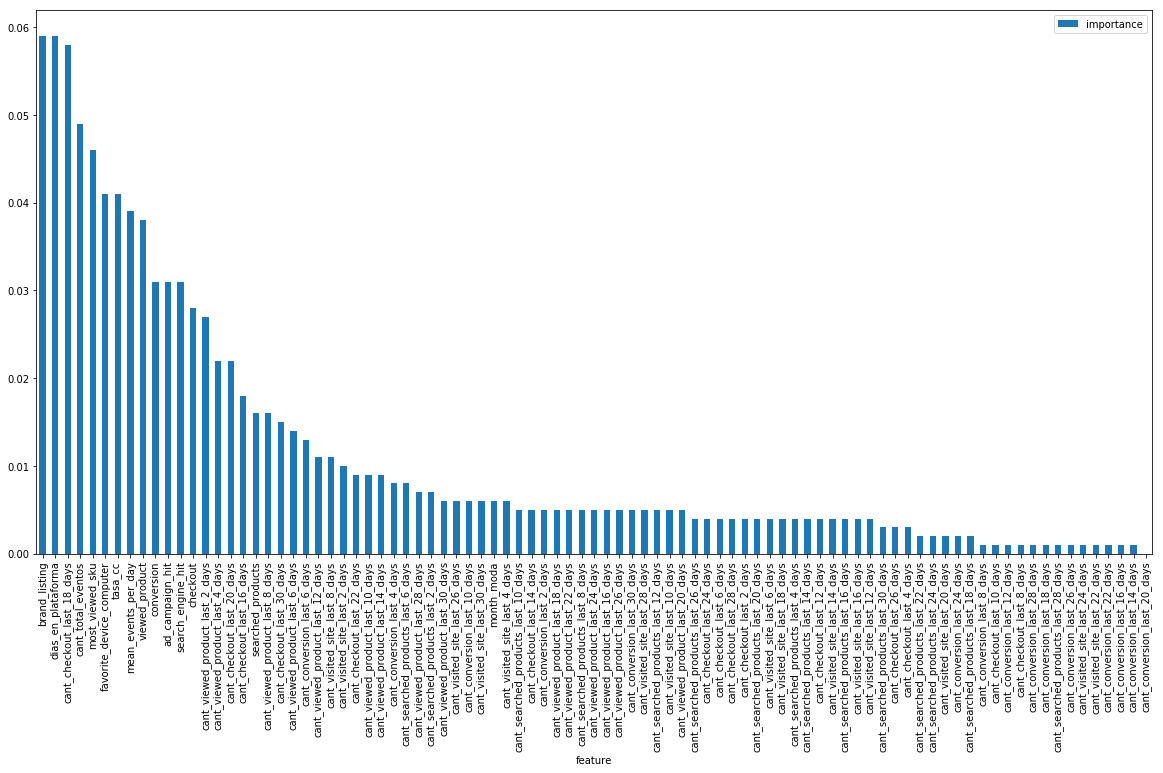

In [228]:
#ax =plot_importance(xgbf)
#fig = ax.figure
#fig.set_size_inches(10, 10)

importances = pd.DataFrame({'feature':features_names,'importance':np.round(xgbf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.plot.bar(figsize=(20,10))

In [229]:
xgbf.fit(x,y, eval_metric='aucpr')
pred = (xgbf.predict_proba(z)[:,1])

In [230]:
z.shape

(19415, 89)

In [231]:
# Tomo las personas que tengo que predecir
persons = test_set['person']

# Les agrego los labels que predije
submit = pd.DataFrame({'label': pred, 'person': persons})

# Creo Data Frame de sumit
submit = submit[['person', 'label']]

# Envío a archivo csv
submit.to_csv('../submits/xgboost_gaby.csv', index=False)

# Cuento cantidad de conversiones
no_conversiones = submit.loc[submit['label'] < 0.5]['label'].count()
print('Cantidad de no conversiones: ' + str(no_conversiones))

conversiones = submit.loc[submit['label'] >= 0.5]['label'].count()
print('Cantidad de conversiones: ' + str(conversiones))

Cantidad de no conversiones: 15760
Cantidad de conversiones: 3655


### submit.shape

# Decision Tree

In [18]:
clf = DecisionTreeClassifier( )
clf.fit(X_train, y_train)

params_optimos_dt = {'criterion':'entropy','class_weight':None ,'splitter':'best', 'max_depth':2, 'min_samples_split':2,\
                     'min_samples_leaf':2, 'max_features':'sqrt', 'presort':True}


# Creamos el logistic regression
clf = DecisionTreeClassifier(**params_optimos_dt)

# Lo entrenamos con nuestro set de entrenamiento
clf.fit(X_train,y_train)

# Predecimos valores de nuestro set de datos
pred = clf.predict(X_test)

# Evaluamos la precisión
precision = accuracy_score(y_test, pred)

print("Precisión: ", precision)

Precisión:  0.9544166881277363


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
criterion=['entropy',"gini"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,8 ,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,5,10]
#
splitter=['best']
# 
random_state = [50,100,120,500]
#
class_weight=[{0:1, 1:25}]
#
presort=[True,False]
# Create the random grid
random_grid = {'max_features': max_features,
               "criterion": criterion,
               'splitter':splitter,
               'max_depth': max_depth,
               "random_state": random_state,
               'presort': presort,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_weight
              }
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'criterion': ['entropy', 'gini'], 'splitter': ['best'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'random_state': [50, 100, 120, 500], 'presort': [True, False], 'min_samples_split': [2, 5, 8, 10], 'min_samples_leaf': [2, 4, 5, 10], 'class_weight': [{0: 1, 1: 25}]}


In [37]:
crf = DecisionTreeClassifier()
crf_random = RandomizedSearchCV(estimator= crf, param_distributions= random_grid,
                               n_iter = 100, cv = 3, verbose = 2, random_state=42, n_jobs=-1, scoring='roc_auc')

In [38]:
estimator = crf
estimator.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [39]:
crf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.5s
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.4s
[CV] splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=500, presort=False, min_

[CV]  splitter=best, random_state=50, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=120, presort=False, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=120, presort=False, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=8, mi

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.8s


[CV] splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=False, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=60, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV]  splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=4, ma

[CV] splitter=best, random_state=120, presort=True, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=110, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=True, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=110, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=True, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=110, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=4, max_feat

[CV]  splitter=best, random_state=500, presort=False, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=100, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=100, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=500, presort=False, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=100, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=100, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=False, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=2, min_samples_leaf=10,

[CV] splitter=best, random_state=50, presort=True, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=70, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=70, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=True, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=70, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=70, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=True, min_samples_split=2, min_samples_leaf=10, max_featu

[CV] splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.6s
[CV] splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.5s
[CV] splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=2, min_samples_leaf=5, max_features=aut

[CV]  splitter=best, random_state=120, presort=False, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=120, presort=False, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=120, presort=False, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.3s
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_leaf=2, m

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   54.0s


[CV]  splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV] splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=True, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=10, min_samples_leaf=4

[CV]  splitter=best, random_state=50, presort=False, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.4s
[CV]  splitter=best, random_state=50, presort=False, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV]  splitter=best, random_state=100, presort=False, min_samples_split=8, min_samples_le

[CV]  splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV] splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=110, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=50, presort=True, min_samples_split=8, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=50, presort=False, min_samples_split=5, min_samples_leaf=5, max

[CV]  splitter=best, random_state=120, presort=True, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=120, presort=False, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=120, presort=False, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=False, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=10, min_s

[CV]  splitter=best, random_state=120, presort=True, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=500, presort=True, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=120, presort=True, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.4s
[CV]  splitter=best, random_state=500, presort=True, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=500, presort=True, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, criterion=gini, class_weight={0: 1, 1: 25} 
[CV] splitter=best, random_state=500, presort=True, min_samples_split=10, min_samples_leaf=2, 

[CV]  splitter=best, random_state=500, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=8, min_sample

[CV]  splitter=best, random_state=100, presort=False, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=gini, class_weight={0: 1, 1: 25}, total=   0.3s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV] splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25} 
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, criterion=entropy, class_weight={0: 1, 1: 25}, total=   0.2s
[CV]  splitter=best, random_state=500, presort=False, min_samples_split=5, min_sample

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt'], 'criterion': ['entropy', 'gini'], 'splitter': ['best'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'random_state': [50, 100, 120, 500], 'presort': [True, False], 'min_samples_split': [2, 5, 8, 10], 'min_samples_leaf': [2, 4, 5, 10], 'class_weight': [{0: 1, 1: 25}]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [40]:
crf_random.best_params_

{'splitter': 'best',
 'random_state': 500,
 'presort': False,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 25}}

In [51]:
# Parámetros óptimos
params_optimos_dt = {'criterion':'entropy','splitter':'best', 'max_depth':10, 'min_samples_split':2,\
                     'min_samples_leaf':4, "random_state":700,'max_features':'sqrt', 'presort':False, "class_weight":{0: 1, 1: 25}}


# Creamos el logistic regression
clf = DecisionTreeClassifier(**params_optimos_dt)

# Lo entrenamos con nuestro set de entrenamiento
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 25}, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=700,
            splitter='best')

In [52]:
pred = clf.predict_proba(X_test)[:,1]
cantidad_unos = 0
cantidad_ceros = 0
for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
            cantidad_unos += 1
        else: 
            pred[i] = 0
            cantidad_ceros += 1
            
print (accuracy_score(y_test, pred, ))          
print (classification_report(y_test, pred))
print ('Cantidad de 0 :' + str(cantidad_ceros))
print ('Cantidad de 1 :' + str(cantidad_unos))
print ('AUC ROC ' + str(roc_auc_score(y_test, pred)))

0.7677053824362606
             precision    recall  f1-score   support

          0       0.99      0.77      0.86      3706
          1       0.14      0.77      0.23       177

avg / total       0.95      0.77      0.83      3883

Cantidad de 0 :2886
Cantidad de 1 :997
AUC ROC 0.7680178120074029


# Extra Trees

In [28]:
clf = ExtraTreesClassifier( )
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#
criterion=['entropy',"gini"]
#
oob_score=[False,True]
#
random_state = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
class_weight=[{0:1, 1:25}]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "criterion": criterion,
               "random_state": random_state,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'criterion': ['entropy', 'gini'], 'random_state': [0, 222, 444, 666, 888, 1111, 1333, 1555, 1777, 2000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': [{0: 1, 1: 25}]}


In [30]:
crf = ExtraTreesClassifier()
crf_random = RandomizedSearchCV(estimator= crf, param_distributions= random_grid,
                               n_iter = 100, cv = 3, verbose = 2, n_jobs=-1, scoring='roc_auc')

In [ ]:
crf_random.fit(X_train, y_train)

In [31]:
# Parámetros óptimos
params_optimos_et = {'criterion': 'entropy','n_estimators':1000, 'max_features':'sqrt', 'max_depth':10, 'min_samples_split':5,
                     'min_samples_leaf':5, 'bootstrap':True, 'random_state': 700,'class_weight': {0: 1, 1: 25}}

# Creamos el extra_trees
clf = ExtraTreesClassifier(**params_optimos_et)

# Lo entrenamos con nuestro set de entrenamiento
clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, class_weight={0: 1, 1: 25},
           criterion='entropy', max_depth=10, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=700,
           verbose=0, warm_start=False)

In [32]:
pred = clf.predict_proba(X_test)[:,1]
cantidad_unos = 0
cantidad_ceros = 0
for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
            cantidad_unos += 1
        else: 
            pred[i] = 0
            cantidad_ceros += 1
            
print (accuracy_score(y_test, pred, ))          
print (classification_report(y_test, pred))
print ('Cantidad de 0 :' + str(cantidad_ceros))
print ('Cantidad de 1 :' + str(cantidad_unos))
print ('AUC ROC ' + str(roc_auc_score(y_test, pred)))

0.8166366211691991
             precision    recall  f1-score   support

          0       0.99      0.82      0.89      3706
          1       0.17      0.77      0.28       177

avg / total       0.95      0.82      0.87      3883

Cantidad de 0 :3074
Cantidad de 1 :809
AUC ROC 0.7963418612663538


# RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, )
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
pred = clf.predict_proba(X_test)[:,1]
cantidad_unos = 0
cantidad_ceros = 0
for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
            cantidad_unos += 1
        else: 
            pred[i] = 0
            cantidad_ceros += 1
            
print (accuracy_score(y_test, pred, ))          
print (classification_report(y_test, pred))
print ('Cantidad de 0 :' + str(cantidad_ceros))
print ('Cantidad de 1 :' + str(cantidad_unos))
print ('AUC ROC ' + str(roc_auc_score(y_test, pred)))

0.9500386299253155
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      3706
          1       0.16      0.02      0.04       177

avg / total       0.92      0.95      0.93      3883

Cantidad de 0 :3858
Cantidad de 1 :25
AUC ROC 0.5084661916391499


In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
class_weight=[{0:1, 1:25}]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': [{0: 1, 1: 25}]}


In [56]:
crf = RandomForestClassifier()
crf_random = RandomizedSearchCV(estimator= crf, param_distributions= random_grid,
                               n_iter = 100, cv = 3, verbose = 2, random_state=42, n_jobs=-1, scoring='roc_auc')

In [ ]:
crf_random.fit(X_train, y_train)

In [69]:
params_optimos_et = {'criterion': 'entropy','n_estimators':1000, 'max_features':'sqrt', 'max_depth':10, 'min_samples_split':2,
                     'min_samples_leaf':4, 'bootstrap':True, 'random_state': 600,'class_weight': {0: 1, 1: 25}}

# Creamos el Random Forest
clf = RandomForestClassifier(**params_optimos_et)


clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 25},
            criterion='entropy', max_depth=10, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=600,
            verbose=0, warm_start=False)

In [70]:
pred = clf.predict_proba(X_test)[:,1]
cantidad_unos = 0
cantidad_ceros = 0
for i in range(0,pred.size):
        if (pred[i] >= 0.5):
            pred[i] = 1
            cantidad_unos += 1
        else: 
            pred[i] = 0
            cantidad_ceros += 1
            
print (accuracy_score(y_test, pred, ))          
print (classification_report(y_test, pred))
print ('Cantidad de 0 :' + str(cantidad_ceros))
print ('Cantidad de 1 :' + str(cantidad_unos))
print ('AUC ROC ' + str(roc_auc_score(y_test, pred)))

0.8323461241308266
             precision    recall  f1-score   support

          0       0.98      0.84      0.91      3706
          1       0.17      0.71      0.28       177

avg / total       0.95      0.83      0.88      3883

Cantidad de 0 :3159
Cantidad de 1 :724
AUC ROC 0.7722924498675229
